In [1]:
import os
import shutil

In [2]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Imports

In [4]:
%cd ..

/


In [5]:
%cd /usr/local/lib/python3.7/dist-packages/tensorflow

/usr/local/lib/python3.7/dist-packages/tensorflow


In [6]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 62203, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 62203 (delta 6), reused 21 (delta 2), pack-reused 62178
Receiving objects: 100% (62203/62203), 574.39 MiB | 27.59 MiB/s, done.
Resolving deltas: 100% (43316/43316), done.


In [7]:
%cd models/research/

/usr/local/lib/python3.7/dist-packages/tensorflow/models/research


In [8]:
os.environ['PYTHONPATH'] += f':/usr/local/lib/python3.7/dist-packages/tensorflow/models/'
os.environ['PYTHONPATH'] += f':/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/'
os.environ['PYTHONPATH'] += f':/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/slim/'
os.environ['PYTHONPATH'] += f':/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/object_detection/'

In [9]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 15.3 MB/s 


In [10]:
! echo $PYTHONPATH

/env/python:/usr/local/lib/python3.7/dist-packages/tensorflow/models/:/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/:/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/slim/:/usr/local/lib/python3.7/dist-packages/tensorflow/models/research/object_detection/


In [11]:
!protoc object_detection/protos/*.proto --python_out=.

In [12]:
!cp object_detection/packages/tf2/setup.py .

In [13]:
!python -m pip install .

Processing /usr/local/lib/python3.7/dist-packages/tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 18.7 MB/s 
     |████████████████████████████████| 1.8 MB 53.1 MB/s 
     |████████████████████████████████| 99 kB 8.4 MB/s 
     |████████████████████████████████| 4.4 MB 48.4 MB/s 
     |████████████████████████████████| 37.1 MB 50 kB/s 
     |████████████████████████████████| 211 kB 54.0 MB/s 
     |████████████████████████████████| 1.1 MB 69.8 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 636 kB 68.0 MB/s 
     |████

In [14]:
!python object_detection/builders/model_builder_tf2_test.py

2021-09-09 23:33:29.070360: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-09 23:33:29.070421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (1694aca063c1): /proc/driver/nvidia/version does not exist
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0909 23:33:29.388867 140245359409024 model_builder.py:1091] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.65s
I0909 23:33:29.722002 140245359409024 test_util.py:2189] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.65s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorf

In [15]:
%cd ..

/usr/local/lib/python3.7/dist-packages/tensorflow/models


In [16]:
!pip install lvis

In [17]:
!pip install tensorflow-addons

In [18]:
root = '/content/drive/My Drive/Fax/FINKI/Semestar-8/IIS/Project/real-time-sign-language-recognition-macedonian/'

# 7. Load Train Model From Checkpoint

In [21]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format
import tensorflow as tf

In [22]:
CONFIG_PATH = f'{root}/pipeline.config'
CHECKPOINT_PATH = f'{root}/train/'
PATH_TO_SAVED_MODEL = f'{root}fine_tune_model/fine_tune_model/saved_model'

In [23]:
ckpt_files = os.listdir(CHECKPOINT_PATH)
ckpt_files

['train',
 'ckpt-4.index',
 'ckpt-3.index',
 'ckpt-5.data-00000-of-00001',
 'checkpoint',
 'ckpt-2.data-00000-of-00001',
 'ckpt-1.data-00000-of-00001',
 'ckpt-2.index',
 'ckpt-3.data-00000-of-00001',
 'ckpt-1.index',
 'ckpt-4.data-00000-of-00001',
 'ckpt-5.index']

In [25]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-5')).expect_partial()

detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# 8. Detect in Real-Time

In [26]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import cv2 
import numpy as np
import time

In [27]:
category_index = label_map_util.create_category_index_from_labelmap(f'{root}workspace/annotations/label_map.pbtxt')

## EXAMPLE 2

In [35]:
#Loading the image
img=os.listdir(f'{root}workspace/images/test')
print(img)
imgs = []
for im in img:
  if im.endswith('.xml'): continue
  new_img = f'{root}workspace/images/test/' + im
  imgs.append(new_img)
print(imgs)
#list containing paths of all the images

['a.de7d18b6-1185-11ec-8921-43976e34675b.jpg', 'a.de7d18b6-1185-11ec-8921-43976e34675b.xml', 'a.dfb10be8-1185-11ec-8921-43976e34675b.jpg', 'a.dfb10be8-1185-11ec-8921-43976e34675b.xml', 'b.05c0a654-1186-11ec-8921-43976e34675b.jpg', 'b.05c0a654-1186-11ec-8921-43976e34675b.xml', 'b.06f51a96-1186-11ec-8921-43976e34675b.jpg', 'b.06f51a96-1186-11ec-8921-43976e34675b.xml']
['/content/drive/My Drive/Fax/FINKI/Semestar-8/IIS/Project/real-time-sign-language-recognition-macedonian/workspace/images/test/a.de7d18b6-1185-11ec-8921-43976e34675b.jpg', '/content/drive/My Drive/Fax/FINKI/Semestar-8/IIS/Project/real-time-sign-language-recognition-macedonian/workspace/images/test/a.dfb10be8-1185-11ec-8921-43976e34675b.jpg', '/content/drive/My Drive/Fax/FINKI/Semestar-8/IIS/Project/real-time-sign-language-recognition-macedonian/workspace/images/test/b.05c0a654-1186-11ec-8921-43976e34675b.jpg', '/content/drive/My Drive/Fax/FINKI/Semestar-8/IIS/Project/real-time-sign-language-recognition-macedonian/workspace

In [36]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from PIL import Image as ImagePIL

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline


def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = ImagePIL.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [37]:
def run_inference_for_single_image(image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = detect_fn
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

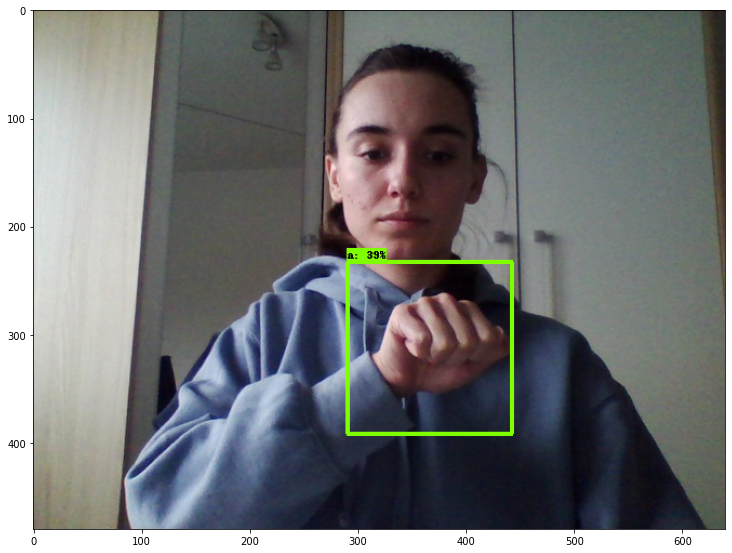

In [40]:
image_path = imgs[1]
image_np = load_image_into_numpy_array(image_path)
#print(image_np)
input_tensor = np.expand_dims(image_np, 0)
start_time = time.time()
detections = detect_fn(input_tensor)
end_time = time.time()
# elapsed.append(end_time - start_time)
#print(detections['detection_scores'])

plt.rcParams['figure.figsize'] = [42, 21]
label_id_offset = 1
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.int32),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=1,
      min_score_thresh=.30,
      agnostic_mode=False)
plt.subplot(2, 1, 0+1)
plt.imshow(image_np_with_detections)

In [41]:
def make_predictions(image_path):
  image_np = load_image_into_numpy_array(image_path)
  #print(image_np)
  input_tensor = np.expand_dims(image_np, 0)
  start_time = time.time()
  detections = detect_fn(input_tensor)
  end_time = time.time()
  # elapsed.append(end_time - start_time)
  #print(detections['detection_scores'])

  plt.rcParams['figure.figsize'] = [42, 21]
  label_id_offset = 1
  image_np_with_detections = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'][0].numpy(),
        detections['detection_classes'][0].numpy().astype(np.int32),
        detections['detection_scores'][0].numpy(),
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=3,
        min_score_thresh=.30,
        agnostic_mode=False)
  plt.subplot(2, 1, 0+1)
  plt.imshow(image_np_with_detections)

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

## Helper Functions
Below are a few helper function to make converting between different image data types and formats. 

In [28]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
from PIL import Image as ImagePIL
import io
import html
import time

In [29]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])

  image = ImagePIL.open(BytesIO(image_bytes))
  (im_width, im_height) = image.size
  image_np = np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img, image_np

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

## Webcam Videos
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.




In [30]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img, image_np = js_to_image(js_reply["img"])

    
    input_tensor = np.expand_dims(image_np, 0)
    start_time = time.time()
    detections = detect_fn(input_tensor)
    output_dict = detections
    end_time = time.time()
    # elapsed.append(end_time - start_time)
    # print(detections['detection_scores'])

    plt.rcParams['figure.figsize'] = [42, 21]
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'][0].numpy(),
          detections['detection_classes'][0].numpy().astype(np.int32),
          detections['detection_scores'][0].numpy(),
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=3,
          min_score_thresh=.50,
          agnostic_mode=False)
    # print(jpg_as_np)

    boxes = np.squeeze(detections['detection_boxes'][0].numpy())
    scores = np.squeeze(detections['detection_scores'][0].numpy().astype(np.int32))
    print(scores)
    #set a min thresh score, say 0.8
    min_score_thresh = 0.1
    bboxes = boxes[scores > min_score_thresh]

    #get image size
    im_width, im_height = 480,640
    final_box = []
    for box in bboxes:
        ymin, xmin, ymax, xmax = box
        final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height])

    # print(final_box)

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

## Hope You Enjoyed!
If you enjoyed the tutorial and want to see more videos or tutorials check out my YouTube channel [HERE](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1)

Have a great day!

In [32]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


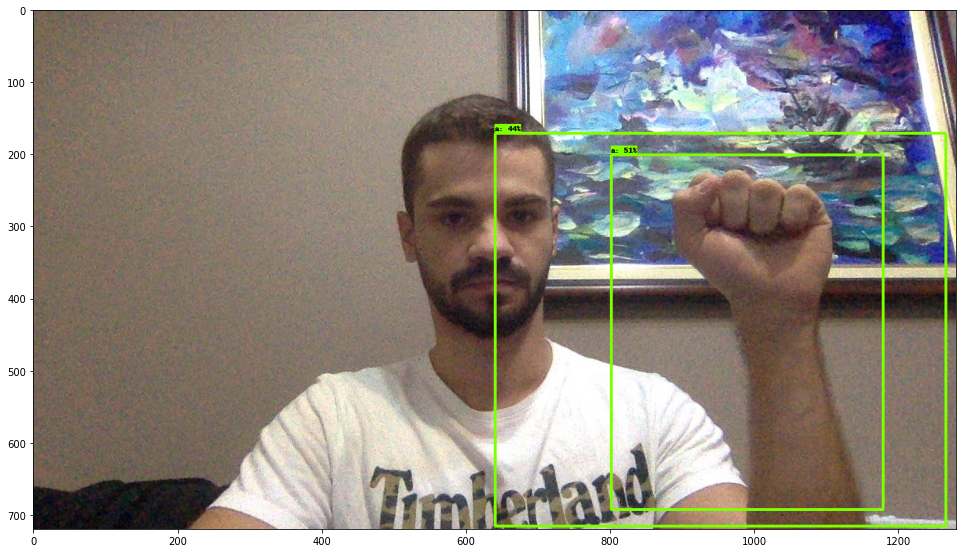

In [43]:

filename = take_photo()
print('Saved to {}'.format(filename))

# Show the image which was just taken.
make_predictions(filename)

<IPython.core.display.Javascript object>

Saved to photo.jpg


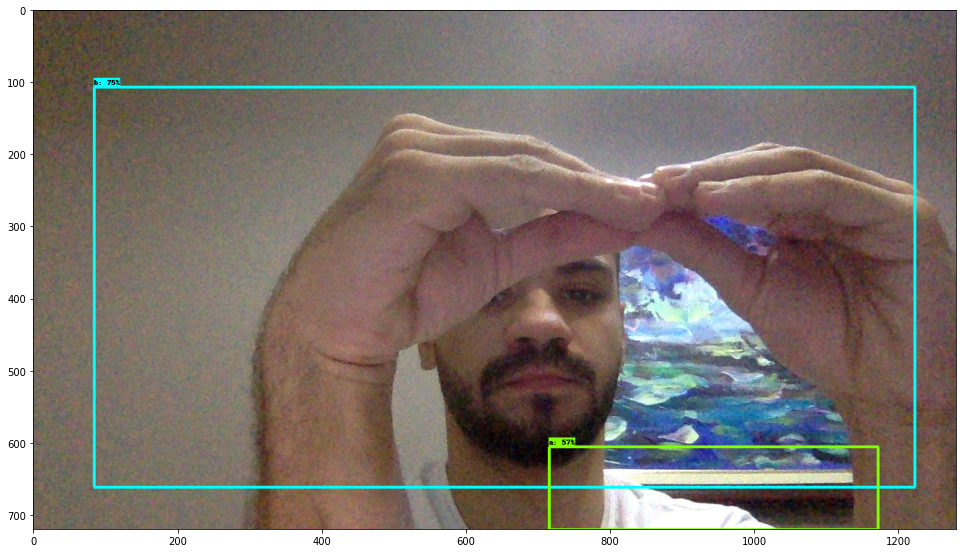

In [48]:
filename = take_photo()
print('Saved to {}'.format(filename))

# Show the image which was just taken.
make_predictions(filename)